In [3]:
import pandas as pd
fd=pd.read_csv("fraud detection.csv")

In [7]:
fd.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [8]:
fd.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [9]:
fd.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [13]:
print(fd.isnull())

          step   type  amount  nameOrig  oldbalanceOrg  newbalanceOrig  \
0        False  False   False     False          False           False   
1        False  False   False     False          False           False   
2        False  False   False     False          False           False   
3        False  False   False     False          False           False   
4        False  False   False     False          False           False   
...        ...    ...     ...       ...            ...             ...   
6362615  False  False   False     False          False           False   
6362616  False  False   False     False          False           False   
6362617  False  False   False     False          False           False   
6362618  False  False   False     False          False           False   
6362619  False  False   False     False          False           False   

         nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0           False           False 

In [14]:
print(fd.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [15]:
print(fd.dtypes)

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object


In [22]:
print(fd.drop_duplicates(inplace=True))

None


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

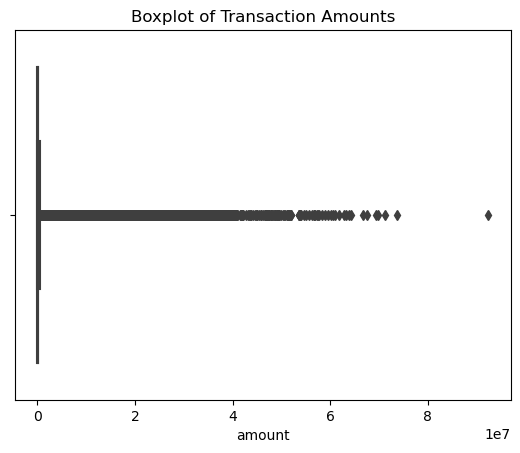

In [7]:
sns.boxplot(x=fd['amount'])
plt.title('Boxplot of Transaction Amounts')
plt.show()

In [4]:
selected_features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
X = fd[selected_features]
y = fd['isFraud']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)

In [7]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9995897916267198
Confusion Matrix:
 [[1270816      88]
 [    434    1186]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.93      0.73      0.82      1620

    accuracy                           1.00   1272524
   macro avg       0.97      0.87      0.91   1272524
weighted avg       1.00      1.00      1.00   1272524



In [21]:
import pandas as pd
import numpy as np
fd_split=fd.iloc[0:12, :]
print(fd_split)

    step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0      1   PAYMENT   9839.64  C1231006815      170136.00       160296.36   
1      1   PAYMENT   1864.28  C1666544295       21249.00        19384.72   
2      1  TRANSFER    181.00  C1305486145         181.00            0.00   
3      1  CASH_OUT    181.00   C840083671         181.00            0.00   
4      1   PAYMENT  11668.14  C2048537720       41554.00        29885.86   
5      1   PAYMENT   7817.71    C90045638       53860.00        46042.29   
6      1   PAYMENT   7107.77   C154988899      183195.00       176087.23   
7      1   PAYMENT   7861.64  C1912850431      176087.23       168225.59   
8      1   PAYMENT   4024.36  C1265012928        2671.00            0.00   
9      1     DEBIT   5337.77   C712410124       41720.00        36382.23   
10     1     DEBIT   9644.94  C1900366749        4465.00            0.00   
11     1   PAYMENT   3099.97   C249177573       20771.00        17671.03   

       name

In [28]:
!pip install --upgrade seaborn


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/7b/e5/83fcd7e9db036c179e0352bfcd20f81d728197a16f883e7b90307a88e65e/seaborn-0.13.0-py3-none-any.whl.metadata
   -------------------------------------- 294.6/294.6 kB 673.8 kB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

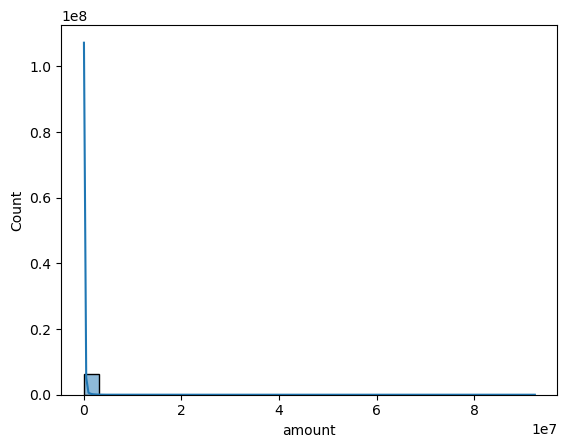

In [58]:
sns.histplot(fd['amount'], bins=30, kde=True)
plt.show()

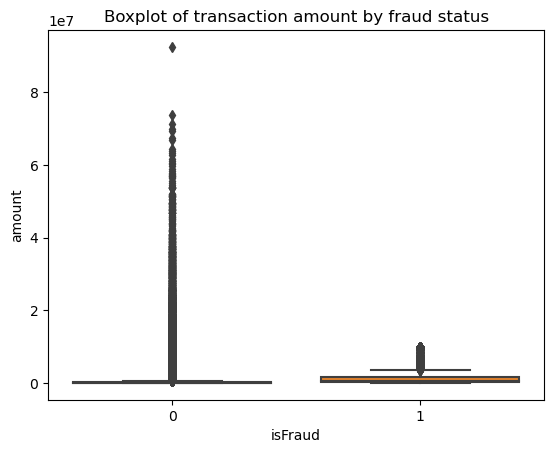

In [59]:
sns.boxplot(x=fd['isFraud'], y=fd["amount"])
plt.xlabel("isFraud")
plt.ylabel("amount")
plt.title("Boxplot of transaction amount by fraud status")
plt.show()

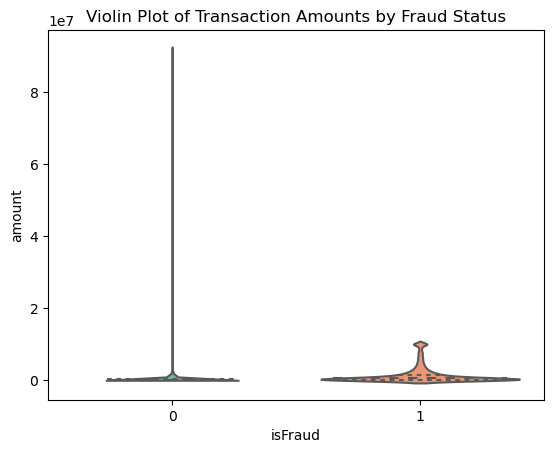

In [60]:
sns.violinplot(x=fd['isFraud'], y=fd['amount'], inner="quartile", palette="Set2")
plt.title('Violin Plot of Transaction Amounts by Fraud Status')
plt.show()

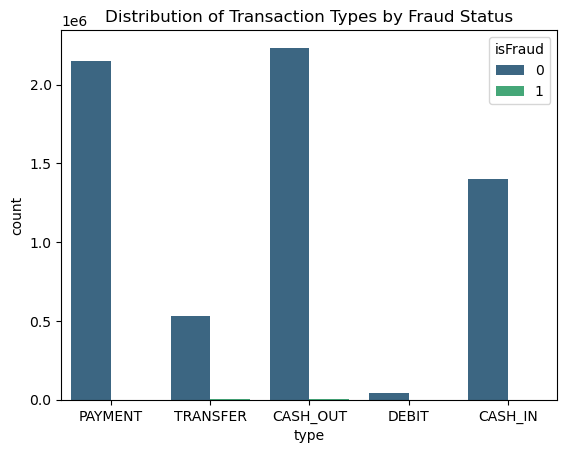

In [61]:
sns.countplot(x='type', hue='isFraud', data=fd, palette='viridis')
plt.title('Distribution of Transaction Types by Fraud Status')
plt.show()

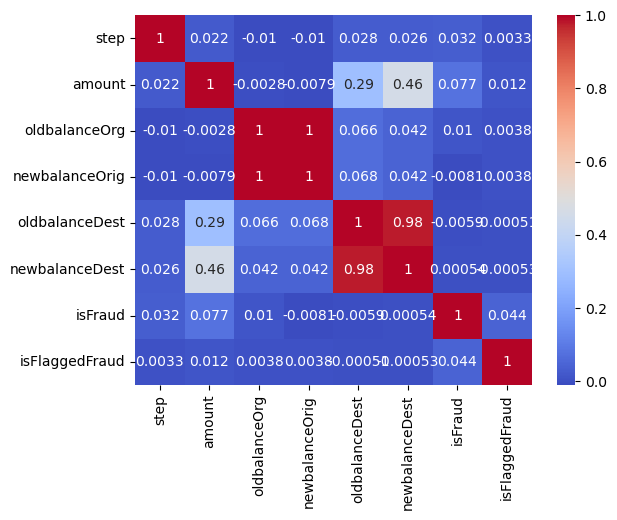

In [62]:
correlation_matrix = fd.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()